<div>
    <h1 align="center">Smart Ensembling</h1>
    <h1 align="center">Tabular Playground Series - Jul 2021</h1>   
    <h4 align="center">By: Somayyeh Gholami & Mehran Kazeminia</h4>
</div>

<div class="alert alert-success">  
</div>

<div class="alert alert-success">
    <h1 align="center">If you find this work useful, please don't forget upvoting :)</h1>
</div>

## Import

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv
/kaggle/input/tps7-19466/logs.log
/kaggle/input/tps7-19466/__notebook_source__.ipynb
/kaggle/input/tps7-19466/sub.csv
/kaggle/input/tps7-19466/catboost_info/learn_error.tsv
/kaggle/input/tps7-19466/catboost_info/catboost_training.json
/kaggle/input/tps7-19466/catboost_info/time_left.tsv
/kaggle/input/tps7-19466/catboost_info/learn/events.out.tfevents
/kaggle/input/tps7-21744/Rplot001.png
/kaggle/input/tps7-21744/Rplot002.png
/kaggle/input/tps7-21744/submission_gam.csv
/kaggle/input/tps7-21744/Rplot003.png


<div class="alert alert-success">  
</div>

## Data Set

Thanks to: @paddykb https://www.kaggle.com/paddykb/tps-07-gam-baseline 

In [3]:
sub21744 = pd.read_csv('../input/tps7-21744/submission_gam.csv')

Thanks to: @junhyeok99 https://www.kaggle.com/junhyeok99/automl-pycaret

In [4]:
sub19466 = pd.read_csv('../input/tps7-19466/sub.csv')

<div class="alert alert-success">  
</div>

<div class="alert alert-success">
    <h1 align="center">Ensembling</h1>
</div>

In [5]:
def ensembling(main, support, coeff1, coeff2, coeff3): 
    
    suba  = main.copy() 
    subav = suba.values
       
    subb  = support.copy()
    subbv = subb.values    
           
    ense  = main.copy()    
    ensev = ense.values  
 
    for i in range (len(main)):
        
        pera1 = subav[i, 1]
        pera2 = subav[i, 2]
        pera3 = subav[i, 3]
        
        perb1 = subbv[i, 1]
        perb2 = subbv[i, 2]
        perb3 = subbv[i, 3]

        per1 = (pera1 * coeff1) + (perb1 * (1.0 - coeff1))
        per2 = (pera2 * coeff2) + (perb2 * (1.0 - coeff2))
        per3 = (pera3 * coeff3) + (perb3 * (1.0 - coeff3))
        
        ensev[i, 1] = per1
        ensev[i, 2] = per2
        ensev[i, 3] = per3
        
    ense.iloc[:, 1:] = ensev[:, 1:] 
    
    ###############################    
    X  = suba.iloc[:, 1]
    Y1 = subb.iloc[:, 1]
    Y2 = ense.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nP R E D I C T  1\n\ntarget_carbon_monoxide\n')   
    
    
    plt.scatter(X, Y1, s=2.0, label='Support')    
    plt.scatter(X, Y2, s=2.0, label='Generated')
    plt.scatter(X, X , s=0.1, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    plt.show()     
    ###############################      
    X  = suba.iloc[:, 2]
    Y1 = subb.iloc[:, 2]
    Y2 = ense.iloc[:, 2]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nP R E D I C T  2\n\ntarget_benzene\n')   
    
    
    plt.scatter(X, Y1, s=2.0, label='Support')    
    plt.scatter(X, Y2, s=2.0, label='Generated')
    plt.scatter(X, X , s=0.1, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    plt.show()     
    ############################### 
    X  = suba.iloc[:, 3]
    Y1 = subb.iloc[:, 3]
    Y2 = ense.iloc[:, 3]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(9, 9), facecolor='lightgray')
    plt.title(f'\nP R E D I C T  3\n\ntarget_nitrogen_oxides\n')   
    
    
    plt.scatter(X, Y1, s=2.0, label='Support')    
    plt.scatter(X, Y2, s=2.0, label='Generated')
    plt.scatter(X, X , s=0.1, label='Main(X=Y)')
    
    plt.legend(fontsize=12, loc=2)
    plt.show()     
    ############################### 
    
    return ense      


<div class="alert alert-success">  
</div>

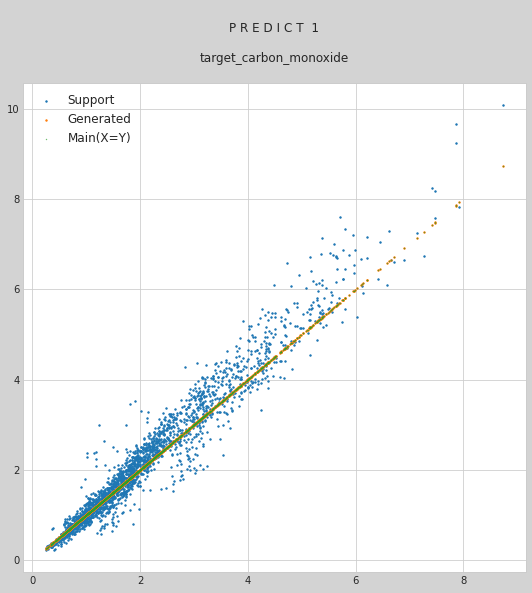

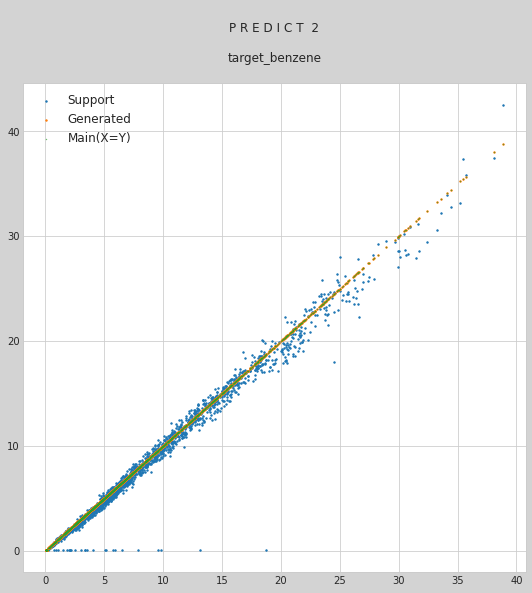

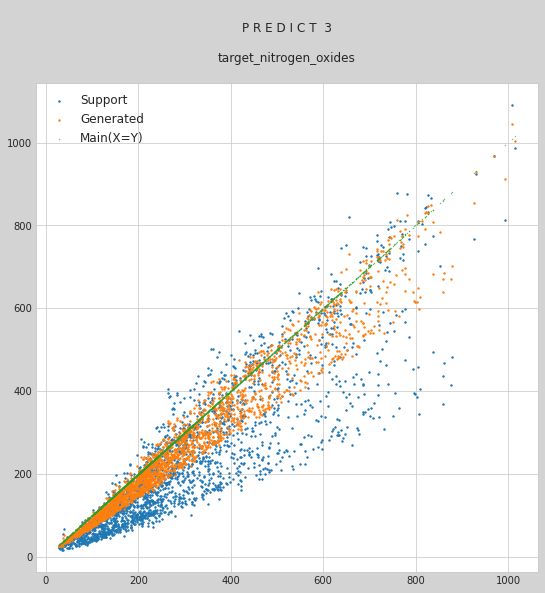

In [6]:
sub = ensembling(sub19466, sub21744, 1.00, 1.00, 0.55)

In [7]:
sub.to_csv("submission.csv",index=False)
# Public Score: 0.19009
!ls

__notebook__.ipynb  submission.csv


<div class="alert alert-success">  
</div>

<div class="alert alert-success">  
</div>